In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

chicago = pd.read_csv("datasets\\chicago_2001_present.csv")

In [3]:
chicago

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410193,13973682,JJ422722,09/20/2025 09:30:00 PM,060XX N ARTESIAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,40.0,2.0,07,1158892.0,1940132.0,2025,09/28/2025 03:42:59 PM,41.991457,-87.690912,"(41.99145724, -87.690912186)"
8410194,13973492,JJ422488,09/20/2025 11:30:00 PM,004XX N PEORIA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24.0,07,1170336.0,1902935.0,2025,09/28/2025 03:42:59 PM,41.889144,-87.649909,"(41.889143855, -87.649909004)"
8410195,13973306,JJ422245,09/20/2025 07:08:00 PM,107XX S PRAIRIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,9.0,49.0,08A,1179819.0,1833810.0,2025,09/28/2025 03:42:59 PM,41.699246,-87.617199,"(41.699245987, -87.61719874)"
8410196,13973002,JJ422001,09/20/2025 03:55:00 PM,034XX W 63RD ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,14.0,66.0,18,1154582.0,1862632.0,2025,09/28/2025 03:42:59 PM,41.778877,-87.708840,"(41.778877155, -87.708840106)"


In [11]:
chicago.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

In [30]:
chicago['Location Description'] = chicago['Location Description'].fillna(chicago['Location Description'].mode()[0])
chicago['District'] = chicago['District'].fillna(chicago['District'].mode()[0])
chicago['Ward'] = chicago['Ward'].fillna(chicago['Ward'].mean())
chicago['Community Area'] = chicago['Community Area'].fillna(chicago['Community Area'].mean())
chicago['X Coordinate'] = chicago['X Coordinate'].fillna(chicago['X Coordinate'].mean())
chicago['Y Coordinate'] = chicago['Y Coordinate'].fillna(chicago['Y Coordinate'].mean())
chicago['Latitude'] = chicago['Latitude'].fillna(chicago['Latitude'].mean())
chicago['Longitude'] = chicago['Longitude'].fillna(chicago['Longitude'].mean())
chicago['Location'] = chicago['Location'].fillna(chicago['Location'].mode()[0])

In [31]:
chicago.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [33]:
chicago.value_counts()

ID        Case Number  Date                    Block                   IUCR  Primary Type             Description                     Location Description  Arrest  Domestic  Beat  District  Ward       Community Area  FBI Code  X Coordinate  Y Coordinate  Year  Updated On              Latitude   Longitude   Location                     
634       G000705      01/01/2001 10:40:00 AM  024XX W MONROE ST       0110  HOMICIDE                 FIRST DEGREE MURDER             CHA STAIRWELL         False   False     1125  11.0      2.000000   28.00000        01A       1.159921e+06  1.899604e+06  2001  09/01/2022 03:42:17 PM  41.880225  -87.688249  (41.880224549, -87.688248952)    1
635       F803142      01/01/2001 03:10:00 PM  023XX N MILWAUKEE AVE   0110  HOMICIDE                 FIRST DEGREE MURDER             AUTO                  False   False     1414  14.0      35.000000  22.00000        01A       1.156620e+06  1.915710e+06  2001  09/19/2022 03:41:05 PM  41.924488  -87.699933  (41.9244882

<h2>1.Which crime types are the most common?</h2>

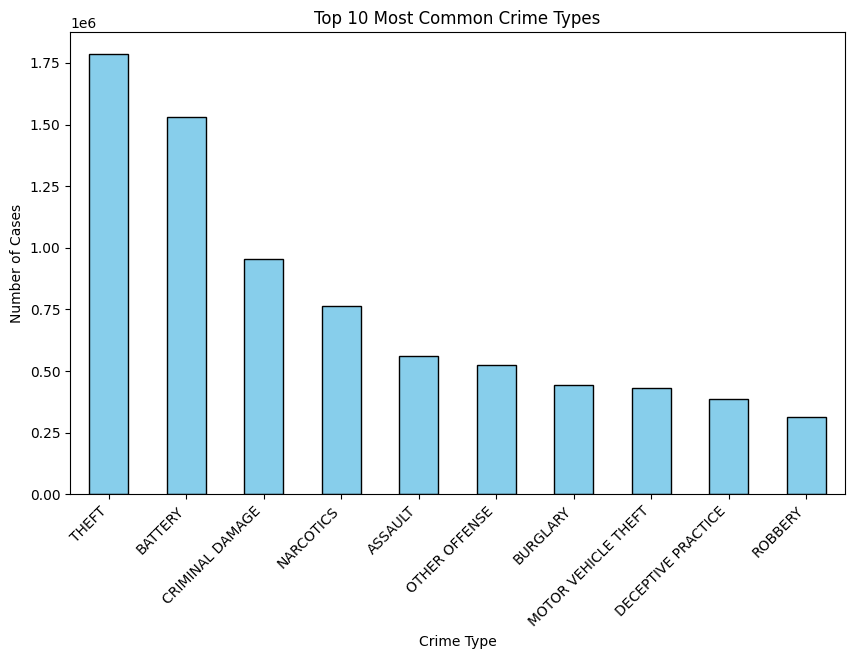

In [34]:
import matplotlib.pyplot as plt

top_crimes = chicago['Primary Type'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_crimes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Most Common Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.show()


<h2>2.Which FBI Code categories appear most frequently?</h2>

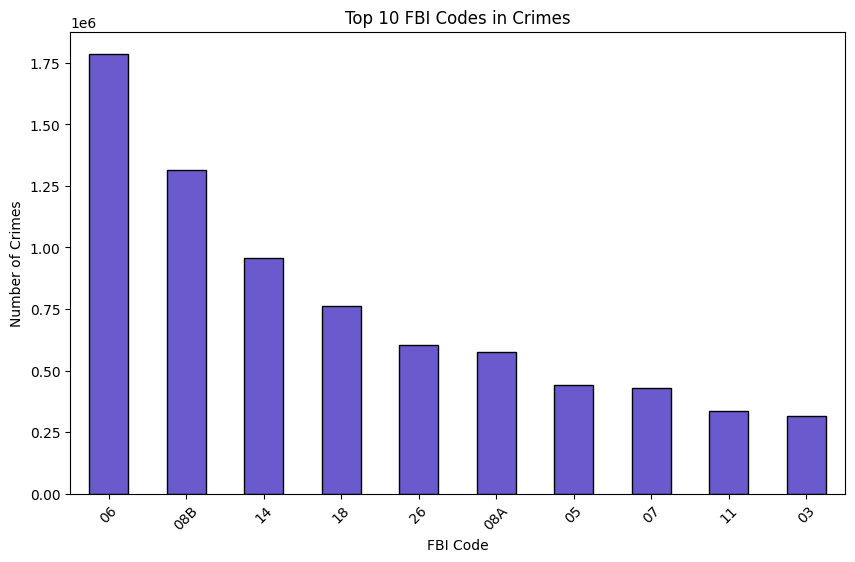

In [36]:
fbi_counts = chicago['FBI Code'].value_counts().head(10)
plt.figure(figsize=(10,6))
fbi_counts.plot(kind='bar', color='slateblue', edgecolor='black')
plt.title("Top 10 FBI Codes in Crimes")
plt.xlabel("FBI Code")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


<h2>3.Which crime descriptions most often lead to arrests?</h2>

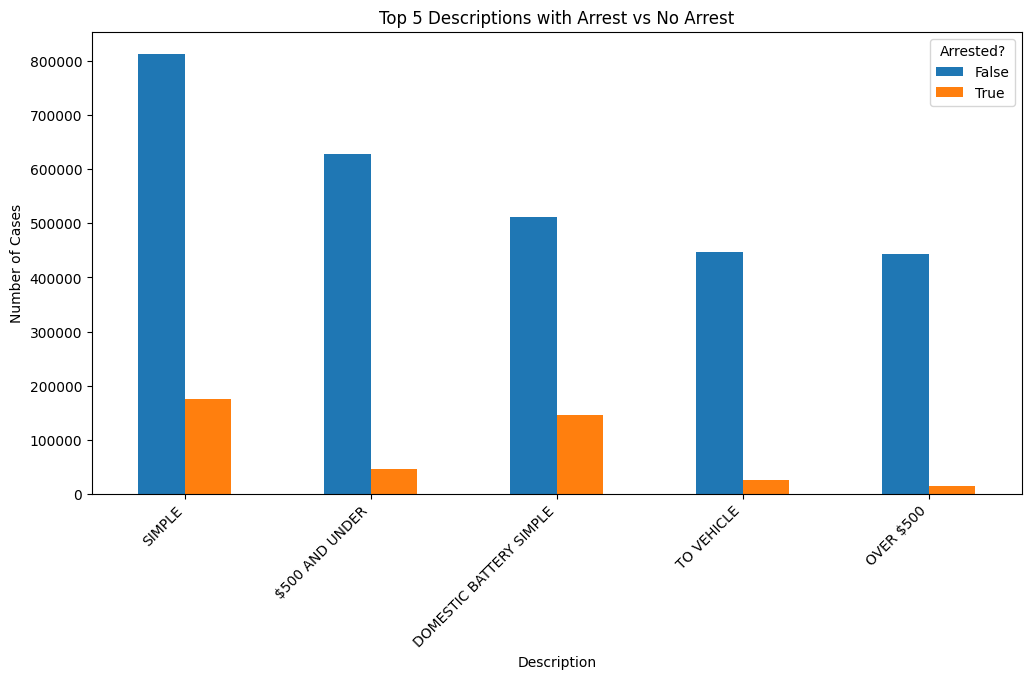

In [38]:
arrest_by_desc = chicago.groupby(['Description','Arrest']).size().unstack(fill_value=0)
top5 = arrest_by_desc.sum(axis=1).sort_values(ascending=False).head(5)

arrest_by_desc = arrest_by_desc.loc[top5.index]

arrest_by_desc.plot(kind='bar', figsize=(12,6))
plt.title("Top 5 Descriptions with Arrest vs No Arrest")
plt.xlabel("Description")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Arrested?")
plt.show()


<h2>4.Which districts reported the most unique case numbers?</h2>

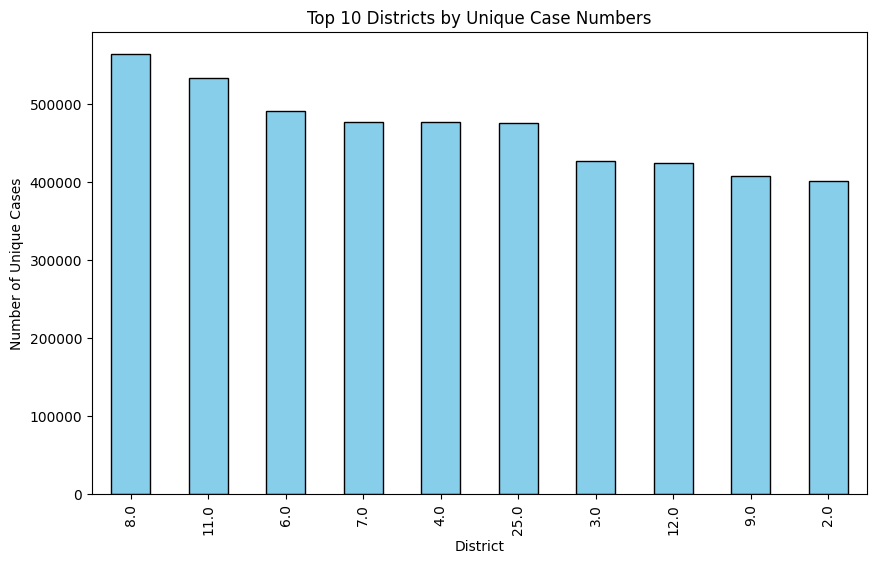

In [39]:
cases_per_district = chicago.groupby('District')['Case Number'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
cases_per_district.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Districts by Unique Case Numbers")
plt.xlabel("District")
plt.ylabel("Number of Unique Cases")
plt.show()
